In [2]:
import urllib.request
from bs4 import BeautifulSoup
url="https://en.wikipedia.org/wiki/Mexico_national_football_team#Players"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Mexico national football team - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
table = soup.find('table', class_='sortable wikitable plainrowheaders')
print(table.prettify())

<table class="sortable wikitable plainrowheaders" style="font-size:100%; width: 98%">
 <tbody>
  <tr>
   <th scope="col" style="width:5%">
    <abbr title="Number">
     No.
    </abbr>
   </th>
   <th scope="col" style="width:5%">
    <abbr title="Position">
     Pos.
    </abbr>
   </th>
   <th scope="col" style="width:30%">
    Player
   </th>
   <th scope="col" style="width:20%">
    Date of birth (age)
   </th>
   <th scope="col" style="width:5%">
    Caps
   </th>
   <th scope="col" style="width:5%">
    Goals
   </th>
   <th scope="col">
    Club
   </th>
  </tr>
  <tr class="nat-fs-player">
   <td>
    1
   </td>
   <td>
    <span style="display:none">
     1
    </span>
    <a href="/wiki/Goalkeeper_(association_football)" title="Goalkeeper (association football)">
     GK
    </a>
   </td>
   <th scope="row">
    <a href="/wiki/Jos%C3%A9_Antonio_Rodr%C3%ADguez_(Mexican_footballer)" title="José Antonio Rodríguez (Mexican footballer)">
     José Antonio Rodríguez
    </a>
   </

In [5]:
for row in table.find_all('tr'):
        cells = row.find_all('td')
        print(f"Number of columns in this row: {len(cells)}")
        for cell in cells:
            print("Column value:", cell.get_text().strip())

Number of columns in this row: 0
Number of columns in this row: 6
Column value: 1
Column value: 1GK
Column value: (1992-07-04) 4 July 1992 (age 31)
Column value: 1
Column value: 0
Column value: Tijuana
Number of columns in this row: 6
Column value: 12
Column value: 1GK
Column value: (1997-03-02) 2 March 1997 (age 26)
Column value: 4
Column value: 0
Column value: América
Number of columns in this row: 6
Column value: 
Column value: 1GK
Column value: (1991-04-23) 23 April 1991 (age 32)
Column value: 0
Column value: 0
Column value: UNAM
Number of columns in this row: 1
Column value: 
Number of columns in this row: 6
Column value: 2
Column value: 2DF
Column value: (2001-08-13) 13 August 2001 (age 22)
Column value: 12
Column value: 0
Column value: Las Palmas
Number of columns in this row: 6
Column value: 3
Column value: 2DF
Column value: (1997-02-24) 24 February 1997 (age 26)
Column value: 42
Column value: 1
Column value: Almería
Number of columns in this row: 6
Column value: 5
Column value

In [6]:

A = []
B = []
C = []
D = []
E = []
F = []
G = []


for rows in table.find_all('tr'):
    cells = rows.find_all('td')
    if len(cells) == 6:
        B.append(cells[0].find(string=True).strip())
        C.append(cells[1].find(string=True).strip())
        birth_link = cells[2].find_all('span')
        D.append(birth_link[2].contents[0].strip())
        E.append(cells[3].find(string=True).strip())
        F.append(cells[4].find(string=True).strip())
        G.append(cells[5].find(string=True).strip())
        
    head = rows.find('th', {"scope" : "row"})
    if head:
        A.append(head.a.text)


In [7]:
import pandas as pd
df=pd.DataFrame(A,columns=['Player'])
df['Number']=pd.Series(B)

df['Age']=pd.Series(D)
df['Caps']=pd.Series(E)
df['Goals']=pd.Series(F)

df

,Player,Number,Age,Caps,Goals
0,José Antonio Rodríguez,1,(age 31),1,0
1,Luis Malagón,12,(age 26),4,0
2,Julio González,,(age 32),0,0
3,Julián Araujo,2,(age 22),12,0
4,César Montes,3,(age 26),42,1
5,Johan Vásquez,5,(age 25),20,1
6,Gerardo Arteaga,6,(age 25),21,1
7,Jorge Sánchez,19,(age 25),40,1
8,Jesús Gallardo,23,(age 29),96,2
9,Israel Reyes,,(age 23),14,2


In [8]:
df.to_csv('mexico_national_team.csv', index=False)
print("mexico_national_team.csv")

mexico_national_team.csv


In [1]:
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

Mexico_Team = pd.read_csv('mexico_national_team.csv')
Mexico_Team.head(26)

,Player,Number,Age,Caps,Goals
0,José Antonio Rodríguez,1.0,(age 31),1,0
1,Luis Malagón,12.0,(age 26),4,0
2,Julio González,NaN,(age 32),0,0
3,Julián Araujo,2.0,(age 22),12,0
4,César Montes,3.0,(age 26),42,1
5,Johan Vásquez,5.0,(age 25),20,1
6,Gerardo Arteaga,6.0,(age 25),21,1
7,Jorge Sánchez,19.0,(age 25),40,1
8,Jesús Gallardo,23.0,(age 29),96,2
9,Israel Reyes,NaN,(age 23),14,2


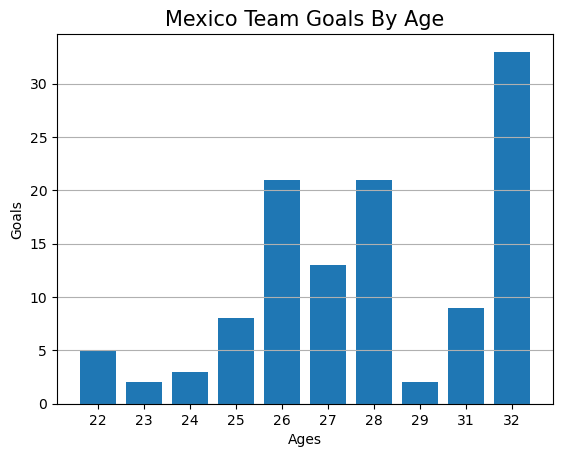

In [23]:
Team_Goals = np.array(Mexico_Team['Goals'])
Ages = [age.split('\xa0')[1].replace(')', '') for age in Mexico_Team['Age']]
Goals_BA = {}
for index, age in enumerate(Ages):
    if age in Goals_BA:
        Goals_BA[age] += int (Team_Goals[index])
    else:
        Goals_BA[age] = int (Team_Goals[index])
SortedAges = list(Goals_BA.keys())
SortedAges.sort()
SortedGoals = [Goals_BA[age] for age in SortedAges]
plt.title('Mexico Team Goals By Age', fontsize=15)
plt.bar(SortedAges, SortedGoals)
plt.xticks(range(0,len(SortedAges)), SortedAges)
plt.xlabel('Ages')
plt.ylabel('Goals')
plt.grid(axis='y')
plt.show()